In [1]:
import pandas as pd
sampled_df=pd.read_csv("Clean_Dataset.csv");

In [3]:
sampled_df.describe

<bound method NDFrame.describe of         Unnamed: 0   airline   flight source_city departure_time stops  \
0                0  SpiceJet  SG-8709       Delhi        Evening  zero   
1                1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2                2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3                3   Vistara   UK-995       Delhi        Morning  zero   
4                4   Vistara   UK-963       Delhi        Morning  zero   
...            ...       ...      ...         ...            ...   ...   
300148      300148   Vistara   UK-822     Chennai        Morning   one   
300149      300149   Vistara   UK-826     Chennai      Afternoon   one   
300150      300150   Vistara   UK-832     Chennai  Early_Morning   one   
300151      300151   Vistara   UK-828     Chennai  Early_Morning   one   
300152      300152   Vistara   UK-822     Chennai        Morning   one   

         arrival_time destination_city     class  duration  days_left  price 

In [4]:
desired_sample_size = 10000
# Randomly sample the dataset
sampled_df = sampled_df.sample(n=desired_sample_size, random_state=42)

In [16]:
sampled_df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_time_encoded,arrival_time_encoded,class_type_encoded
27131,27131,Air_India,AI-506,Delhi,Morning,one,Early_Morning,Kolkata,Economy,19.75,40,7366,4,1,1
266857,266857,Vistara,UK-706,Kolkata,Morning,one,Night,Mumbai,Business,9.83,42,64831,4,5,0
141228,141228,Vistara,UK-772,Kolkata,Morning,one,Night,Bangalore,Economy,10.50,41,6195,4,5,1
288329,288329,Vistara,UK-824,Chennai,Night,one,Morning,Delhi,Business,14.50,14,60160,5,4,0
97334,97334,Air_India,AI-501,Bangalore,Afternoon,one,Night,Mumbai,Economy,8.25,20,6578,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27874,27874,Air_India,AI-803,Delhi,Early_Morning,one,Evening,Kolkata,Economy,11.42,44,6946,1,2,1
56233,56233,GO_FIRST,G8-575,Mumbai,Early_Morning,one,Afternoon,Bangalore,Economy,10.25,21,4750,1,0,1
98649,98649,Vistara,UK-814,Bangalore,Night,one,Early_Morning,Mumbai,Economy,10.75,27,6568,5,1,1
250921,250921,Vistara,UK-854,Bangalore,Evening,zero,Night,Mumbai,Business,1.83,28,20760,2,5,0


In [7]:
sampled_df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit and transform the 'departure_time' column
sampled_df['departure_time_encoded'] = le.fit_transform(sampled_df['departure_time'])
# Display the mapping between original values and encoded values
print("Mapping of class type values to numerical labels:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
  print(f"{original}: {encoded}")
# Display the DataFrame with the new encoded column
print(sampled_df[['departure_time', 'departure_time_encoded']])

Mapping of class type values to numerical labels:
Afternoon: 0
Early_Morning: 1
Evening: 2
Late_Night: 3
Morning: 4
Night: 5
       departure_time  departure_time_encoded
27131         Morning                       4
266857        Morning                       4
141228        Morning                       4
288329          Night                       5
97334       Afternoon                       0
...               ...                     ...
27874   Early_Morning                       1
56233   Early_Morning                       1
98649           Night                       5
250921        Evening                       2
244645        Evening                       2

[10000 rows x 2 columns]


In [14]:
le = LabelEncoder()
# Fit and transform the 'departure_time' column
sampled_df['arrival_time_encoded'] = le.fit_transform(sampled_df['arrival_time'])
# Display the DataFrame with the new encoded column
print(sampled_df[['arrival_time', 'arrival_time_encoded']])

         arrival_time  arrival_time_encoded
27131   Early_Morning                     1
266857          Night                     5
141228          Night                     5
288329        Morning                     4
97334           Night                     5
...               ...                   ...
27874         Evening                     2
56233       Afternoon                     0
98649   Early_Morning                     1
250921          Night                     5
244645        Morning                     4

[10000 rows x 2 columns]


In [19]:
le = LabelEncoder()
sampled_df['class_type_encoded'] = le.fit_transform(sampled_df['class'])
# Display the mapping between original values and encoded values
print("Mapping of class type values to numerical labels:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
  print(f"{original}: {encoded}")
print(sampled_df[['class', 'class_type_encoded']])



Mapping of class type values to numerical labels:
Business: 0
Economy: 1
           class  class_type_encoded
27131    Economy                   1
266857  Business                   0
141228   Economy                   1
288329  Business                   0
97334    Economy                   1
...          ...                 ...
27874    Economy                   1
56233    Economy                   1
98649    Economy                   1
250921  Business                   0
244645  Business                   0

[10000 rows x 2 columns]


In [21]:
# Fit and transform the 'departure_time' column
sampled_df['destination_city_encoded'] = le.fit_transform(sampled_df['destination_city'])
# Display the mapping between original values and encoded values
print("Mapping of destination_city values to numerical labels:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
    print(f"{original}: {encoded}")
# Display the DataFrame with the new encoded column
print(sampled_df[['destination_city', 'destination_city_encoded']])

Mapping of destination_city values to numerical labels:
Bangalore: 0
Chennai: 1
Delhi: 2
Hyderabad: 3
Kolkata: 4
Mumbai: 5
       destination_city  destination_city_encoded
27131           Kolkata                         4
266857           Mumbai                         5
141228        Bangalore                         0
288329            Delhi                         2
97334            Mumbai                         5
...                 ...                       ...
27874           Kolkata                         4
56233         Bangalore                         0
98649            Mumbai                         5
250921           Mumbai                         5
244645          Chennai                         1

[10000 rows x 2 columns]


In [22]:
# Fit and transform the 'departure_time' column
sampled_df['source_city_encoded'] = le.fit_transform(sampled_df['source_city'])
# Display the mapping between original values and encoded values
print("Mapping of source_city values to numerical labels:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
  print(f"{original}: {encoded}")
# Display the DataFrame with the new encoded column
print(sampled_df[['source_city', 'source_city_encoded']])

Mapping of source_city values to numerical labels:
Bangalore: 0
Chennai: 1
Delhi: 2
Hyderabad: 3
Kolkata: 4
Mumbai: 5
       source_city  source_city_encoded
27131        Delhi                    2
266857     Kolkata                    4
141228     Kolkata                    4
288329     Chennai                    1
97334    Bangalore                    0
...            ...                  ...
27874        Delhi                    2
56233       Mumbai                    5
98649    Bangalore                    0
250921   Bangalore                    0
244645      Mumbai                    5

[10000 rows x 2 columns]


In [23]:
# Fit and transform the 'departure_time' column
sampled_df['airline_encoded'] = le.fit_transform(sampled_df['airline'])
# Display the mapping between original values and encoded values
print("Mapping of airline values to numerical labels:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
  print(f"{original}: {encoded}")
# Display the DataFrame with the new encoded column
print(sampled_df[['airline', 'airline_encoded']]) 

Mapping of airline values to numerical labels:
AirAsia: 0
Air_India: 1
GO_FIRST: 2
Indigo: 3
SpiceJet: 4
Vistara: 5
          airline  airline_encoded
27131   Air_India                1
266857    Vistara                5
141228    Vistara                5
288329    Vistara                5
97334   Air_India                1
...           ...              ...
27874   Air_India                1
56233    GO_FIRST                2
98649     Vistara                5
250921    Vistara                5
244645  Air_India                1

[10000 rows x 2 columns]


In [24]:
# Fit and transform the 'departure_time' column
sampled_df['flight_encoded'] = le.fit_transform(sampled_df['flight'])
#print("Mapping of flight name to numerical labels:")
#for original, encoded in zip(le.classes_, le.transform(le.classes_)):
print(f"{original}: {encoded}")
# Display the DataFrame with the new encoded column
print(sampled_df[['flight', 'flight_encoded']])
#

Vistara: 5
        flight  flight_encoded
27131   AI-506             486
266857  UK-706            1019
141228  UK-772            1028
288329  UK-824            1053
97334   AI-501             481
...        ...             ...
27874   AI-803             581
56233   G8-575             755
98649   UK-814            1043
250921  UK-854            1077
244645  AI-660             539

[10000 rows x 2 columns]


In [25]:
sampled_df['stops_encoded'] = le.fit_transform(sampled_df['stops'])
# Display the mapping between original values and encoded values
print("Mapping of stops to numerical labels:")
for original, encoded in zip(le.classes_, le.transform(le.classes_)):
 print(f"{original}: {encoded}")
# Display the DataFrame with the new encoded column
print(sampled_df[['stops', 'stops_encoded']])

Mapping of stops to numerical labels:
one: 0
two_or_more: 1
zero: 2
       stops  stops_encoded
27131    one              0
266857   one              0
141228   one              0
288329   one              0
97334    one              0
...      ...            ...
27874    one              0
56233    one              0
98649    one              0
250921  zero              2
244645   one              0

[10000 rows x 2 columns]


In [26]:
sampled_df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,departure_time_encoded,arrival_time_encoded,class_type_encoded,destination_city_encoded,source_city_encoded,airline_encoded,flight_encoded,stops_encoded
27131,27131,Air_India,AI-506,Delhi,Morning,one,Early_Morning,Kolkata,Economy,19.75,40,7366,4,1,1,4,2,1,486,0
266857,266857,Vistara,UK-706,Kolkata,Morning,one,Night,Mumbai,Business,9.83,42,64831,4,5,0,5,4,5,1019,0
141228,141228,Vistara,UK-772,Kolkata,Morning,one,Night,Bangalore,Economy,10.50,41,6195,4,5,1,0,4,5,1028,0
288329,288329,Vistara,UK-824,Chennai,Night,one,Morning,Delhi,Business,14.50,14,60160,5,4,0,2,1,5,1053,0
97334,97334,Air_India,AI-501,Bangalore,Afternoon,one,Night,Mumbai,Economy,8.25,20,6578,0,5,1,5,0,1,481,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27874,27874,Air_India,AI-803,Delhi,Early_Morning,one,Evening,Kolkata,Economy,11.42,44,6946,1,2,1,4,2,1,581,0
56233,56233,GO_FIRST,G8-575,Mumbai,Early_Morning,one,Afternoon,Bangalore,Economy,10.25,21,4750,1,0,1,0,5,2,755,0
98649,98649,Vistara,UK-814,Bangalore,Night,one,Early_Morning,Mumbai,Economy,10.75,27,6568,5,1,1,5,0,5,1043,0
250921,250921,Vistara,UK-854,Bangalore,Evening,zero,Night,Mumbai,Business,1.83,28,20760,2,5,0,5,0,5,1077,2


In [28]:
sampled_df.corr()

C:\Users\pradh\AppData\Local\Temp\ipykernel_8736\512833762.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sampled_df.corr()


,Unnamed: 0,duration,days_left,price,departure_time_encoded,arrival_time_encoded,class_type_encoded,destination_city_encoded,source_city_encoded,airline_encoded,flight_encoded,stops_encoded
Unnamed: 0,1.000000,0.176577,0.014602,0.758155,0.079345,0.013125,-0.800988,0.020471,-0.083641,0.177108,0.203911,-0.123459
duration,0.176577,1.000000,-0.039263,0.211685,0.090356,-0.000597,-0.153988,0.021928,-0.009083,-0.006552,0.185596,-0.463801
days_left,0.014602,-0.039263,1.000000,-0.103214,-0.004261,-0.010206,0.024039,-0.032370,-0.000722,-0.009711,0.006088,-0.006167
price,0.758155,0.211685,-0.103214,1.000000,0.049364,0.024711,-0.938068,0.016653,0.007341,0.251281,0.302738,-0.196331
departure_time_encoded,0.079345,0.090356,-0.004261,0.049364,1.000000,-0.036925,-0.046382,-0.014108,0.004266,0.043729,0.076536,0.002270
arrival_time_encoded,0.013125,-0.000597,-0.010206,0.024711,-0.036925,1.000000,-0.009177,-0.020099,0.038177,0.047265,0.065401,0.019241
class_type_encoded,-0.800988,-0.153988,0.024039,-0.938068,-0.046382,-0.009177,1.000000,-0.007136,-0.005676,-0.189846,-0.257557,0.096107
destination_city_encoded,0.020471,0.021928,-0.032370,0.016653,-0.014108,-0.020099,-0.007136,1.000000,-0.223457,-0.038101,-0.042978,-0.028949
source_city_encoded,-0.083641,-0.009083,-0.000722,0.007341,0.004266,0.038177,-0.005676,-0.223457,1.000000,-0.032779,-0.020425,0.018104
airline_encoded,0.177108,-0.006552,-0.009711,0.251281,0.043729,0.047265,-0.189846,-0.038101,-0.032779,1.000000,0.651090,-0.018306


C:\Users\pradh\AppData\Local\Temp\ipykernel_8736\3269322922.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sampled_df.corr()


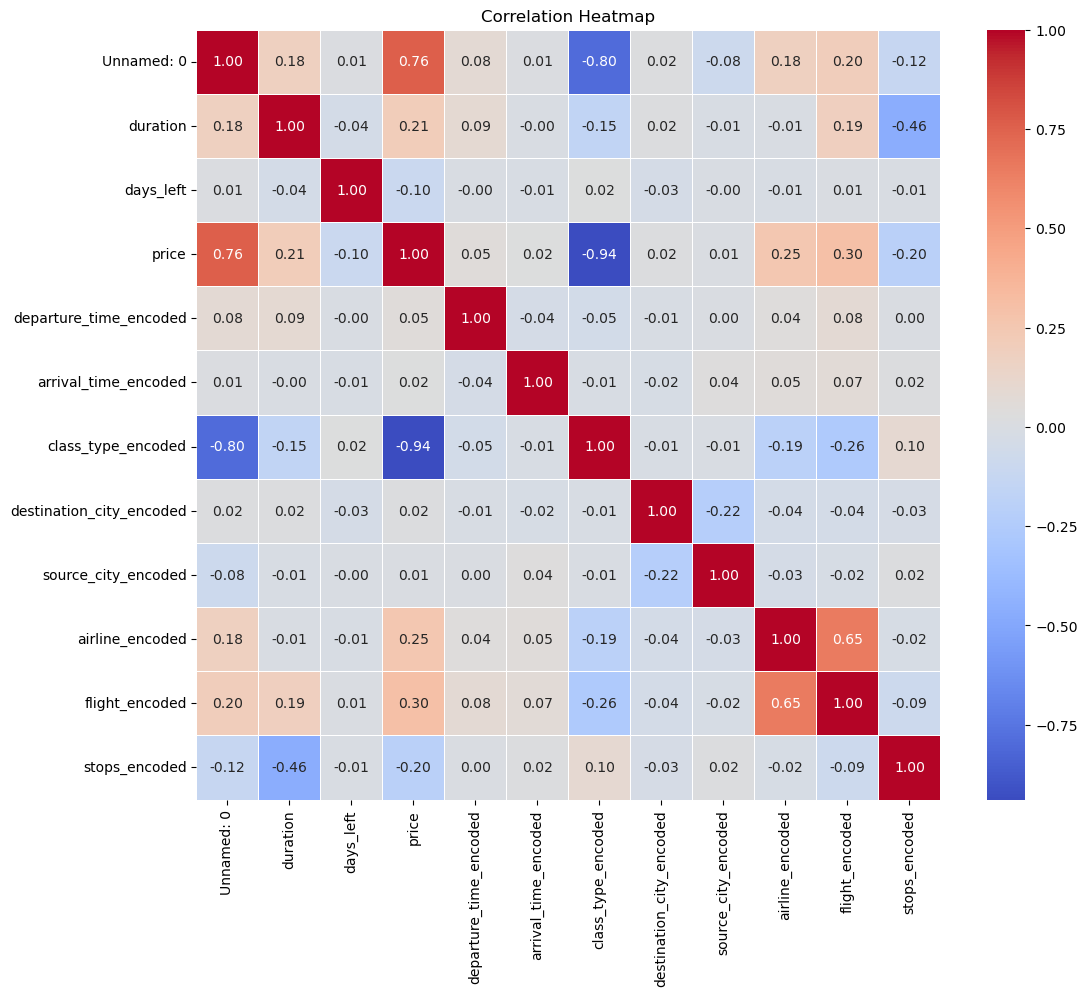

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = sampled_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

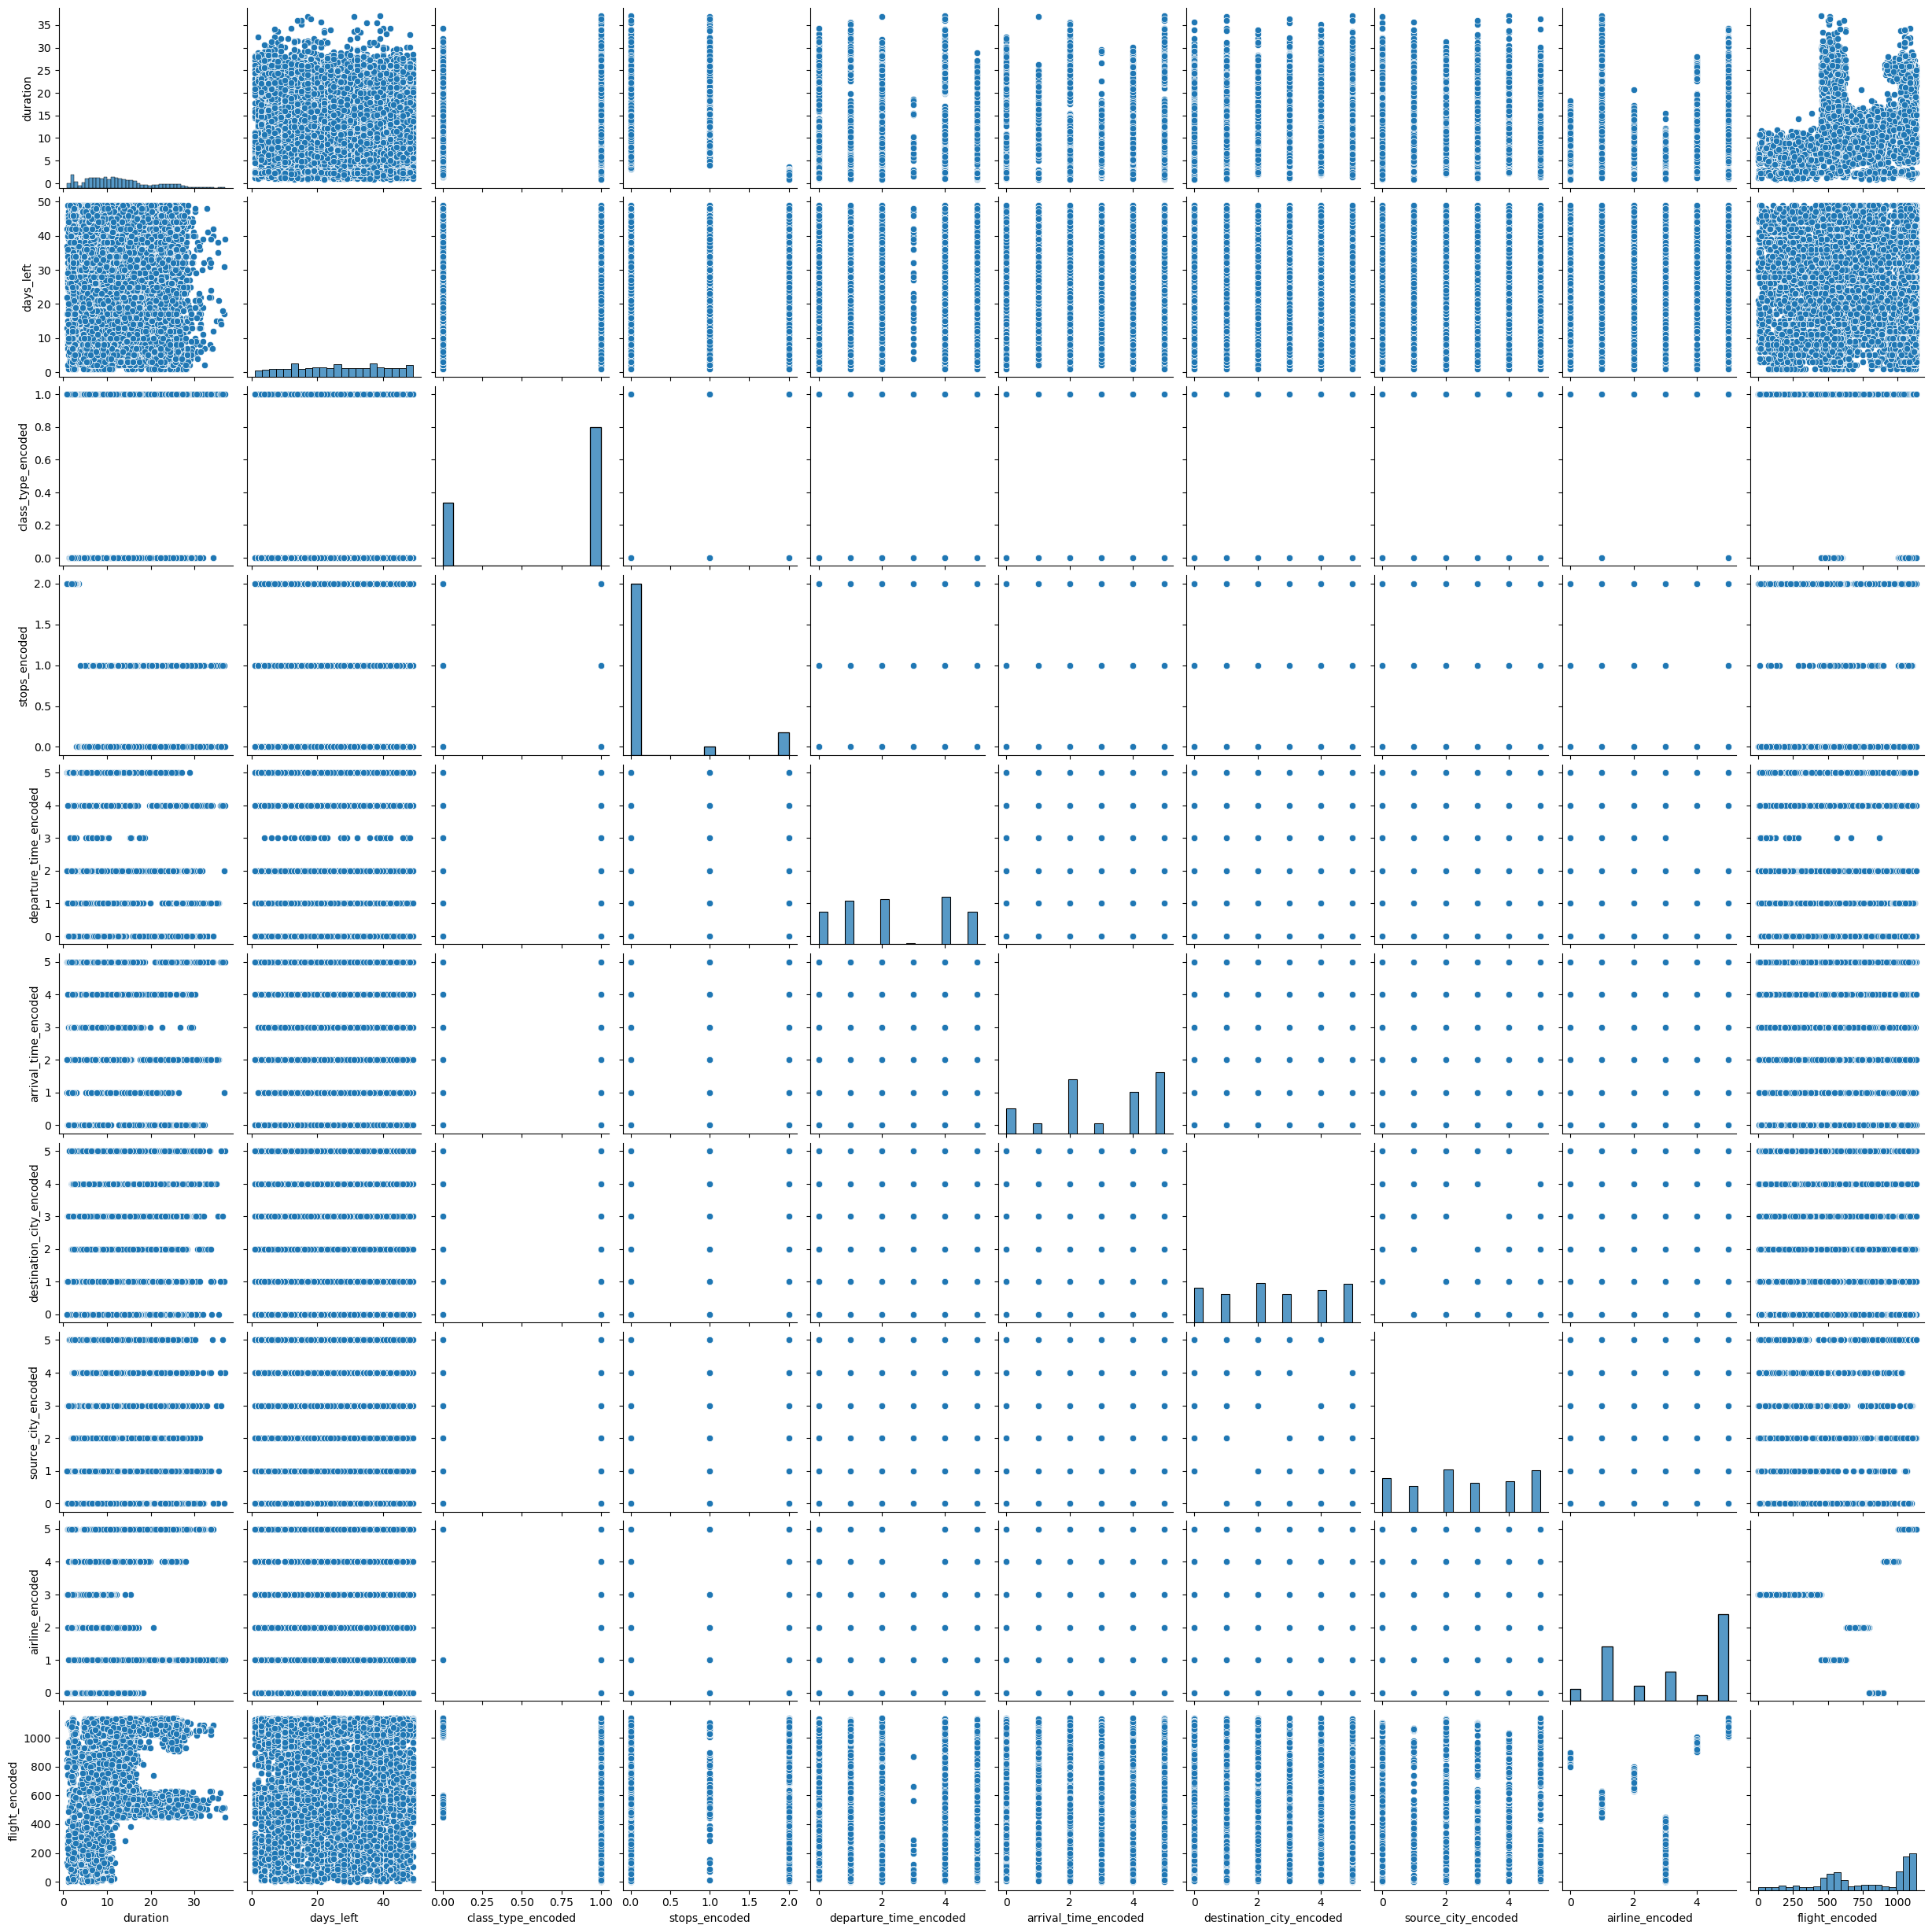

In [30]:
sns.pairplot (sampled_df[['duration', 'days_left', 'class_type_encoded', 'stops_encoded','departure_time_encoded','arrival_time_encoded','destination_city_encoded','source_city_encoded','airline_encoded','flight_encoded']])
plt.show()

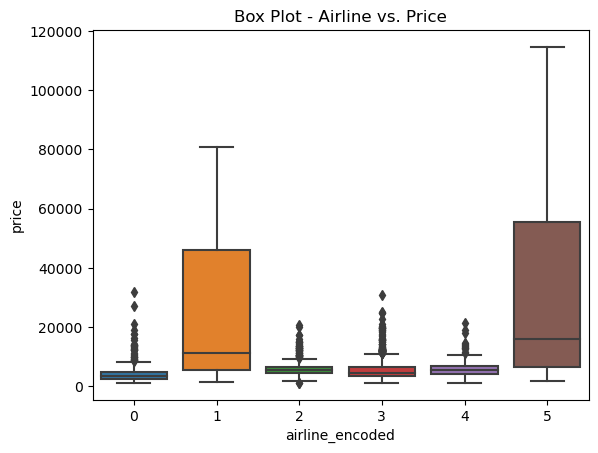

In [31]:
# Box plot for Airline
sns.boxplot(x='airline_encoded', y='price', data=sampled_df)
plt.title('Box Plot - Airline vs. Price')
plt.show()

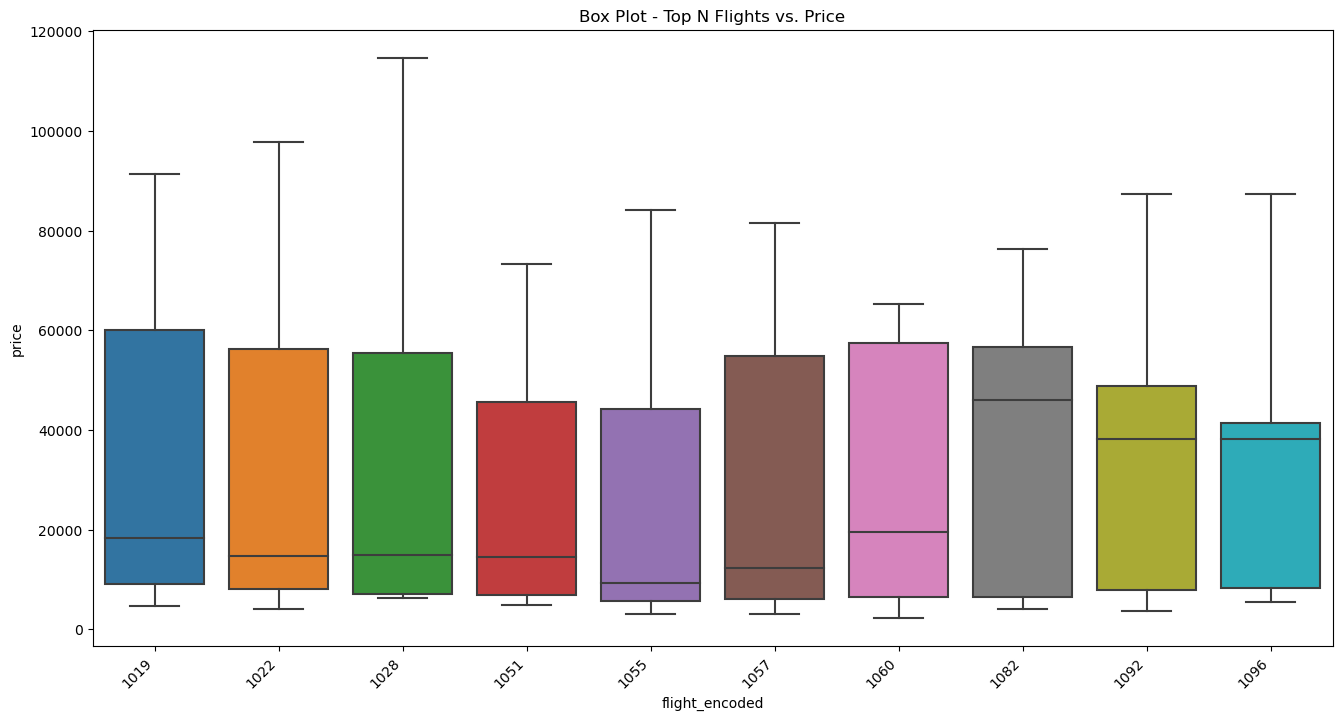

In [32]:
# Choose the top N flights based on frequency or median prices
top_n_flights = sampled_df['flight_encoded'].value_counts().nlargest(10). index
# Filter the dataframe for the top N flights
top_flights_df = sampled_df[sampled_df['flight_encoded'].isin(top_n_flights) ]
# Increase figure size
plt.figure(figsize=(16, 8))
# Box plot for top N flights
sns.boxplot(x='flight_encoded', y='price', data=top_flights_df)
plt.title('Box Plot - Top N Flights vs. Price')
plt.xticks(rotation=45, ha='right')
plt.show()

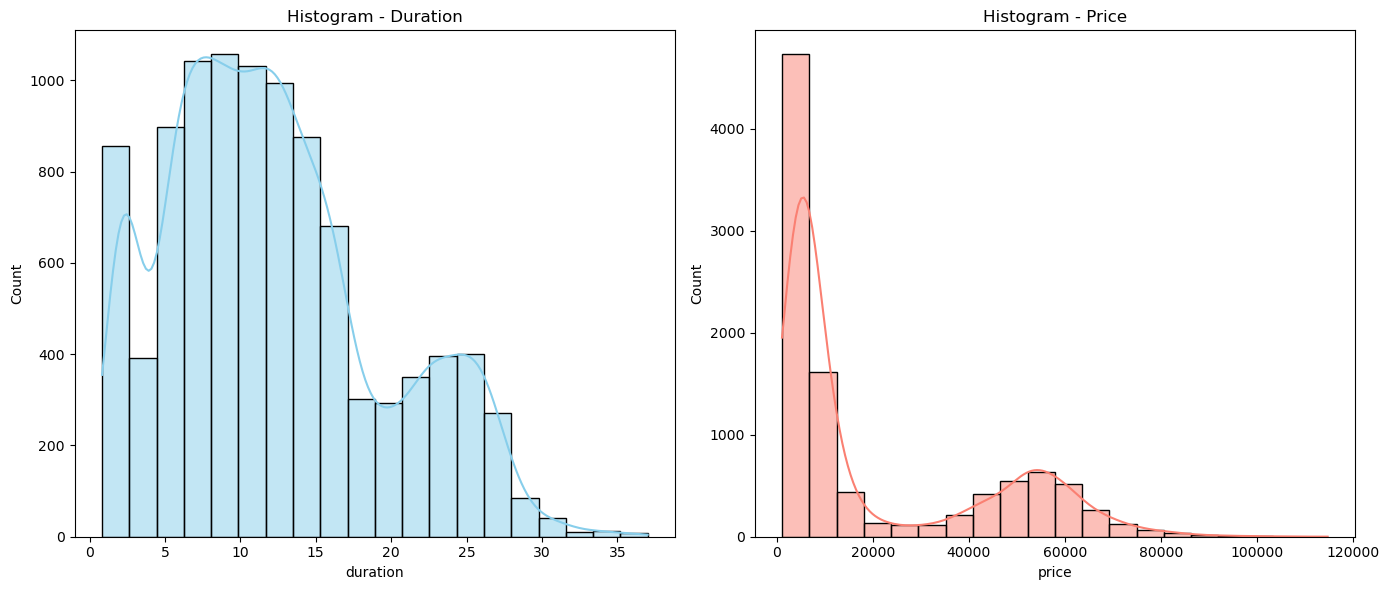

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
# Increase figure size
plt.figure(figsize=(14, 6))
# Subplot 1: Histogram and KDE for 'duration'
plt.subplot(1, 2, 1)
sns.histplot(sampled_df['duration'], kde=True, bins=20, color='skyblue')
plt.title('Histogram - Duration')
# Subplot 2: Histogram and KDE for 'price'
plt.subplot(1, 2, 2)
sns.histplot(sampled_df['price'], kde=True, bins=20, color='salmon')
plt.title('Histogram - Price')
plt.tight_layout()
plt.show()

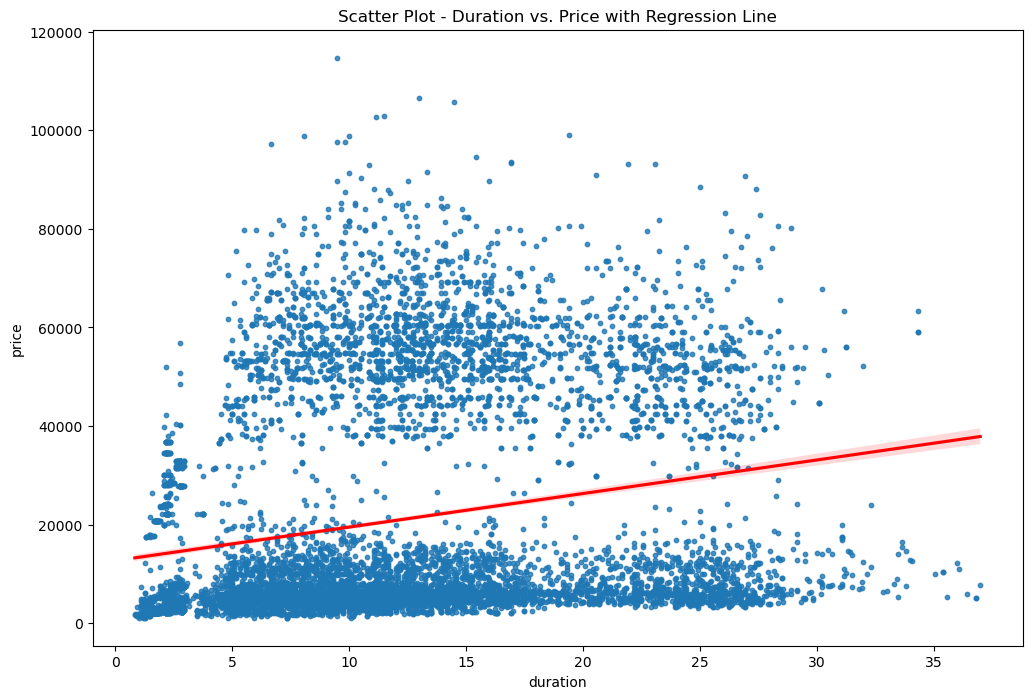

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Increase figure size
plt.figure(figsize=(12, 8))

# Scatter plot with regression Line
sns.regplot(x='duration', y='price', data=sampled_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})

plt.title('Scatter Plot - Duration vs. Price with Regression Line')
plt.show()


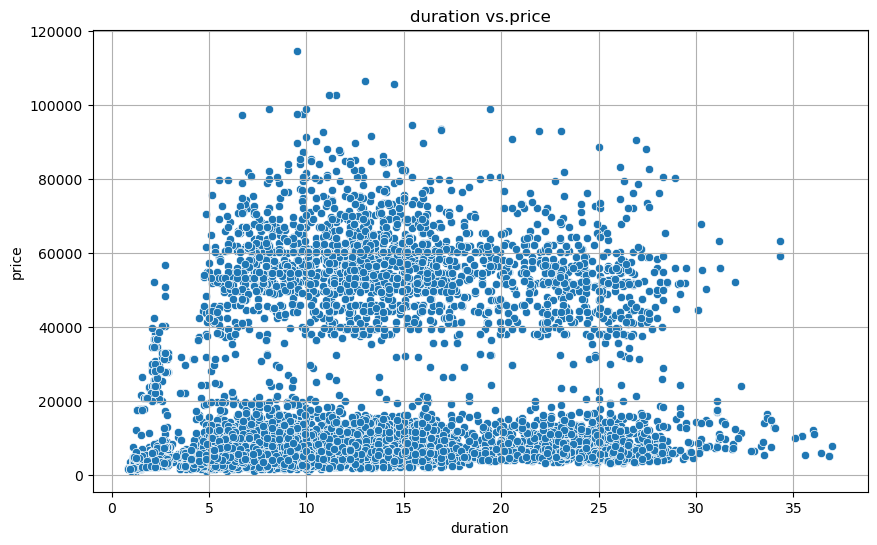

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='price', data=sampled_df)
plt.title('duration vs.price')
plt.xlabel('duration')
plt.ylabel('price')
plt.grid(True)
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X = sampled_df[['duration', 'days_left', 'departure_time_encoded','arrival_time_encoded', 'class_type_encoded','destination_city_encoded','source_city_encoded','airline_encoded','flight_encoded','stops_encoded']]
y = sampled_df['price']
# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
# Create a Linear regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred)
r2_linear = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse_linear}")
print(f"R-squared (R2): {r2_linear}")

Mean Squared Error (MSE): 51137042.0622401
R-squared (R2): 0.9038523262467626


In [40]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
# List of regression models
model_rf = RandomForestRegressor()
# Train the model
model_rf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = model_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 15842793.152705498
R-squared (R2): 0.9702124400247404


In [41]:
model_names = ['Linear Regression', 'Random_Forest_Regressor']
import numpy as np
# MSE scores
mse_scores = [mse_linear, mse]
# R2 scores
r2_scores = [r2_linear, r2]
best_model_mse = model_names[np.argmin(mse_scores) ]
print(f'Best model based on Mean Squared Error (MSE): {best_model_mse}')
best_model_r2 = model_names [np.argmax(r2_scores) ]
print(f'Best model based on R-squared (R2): {best_model_r2}')

Best model based on Mean Squared Error (MSE): Random_Forest_Regressor
Best model based on R-squared (R2): Random_Forest_Regressor


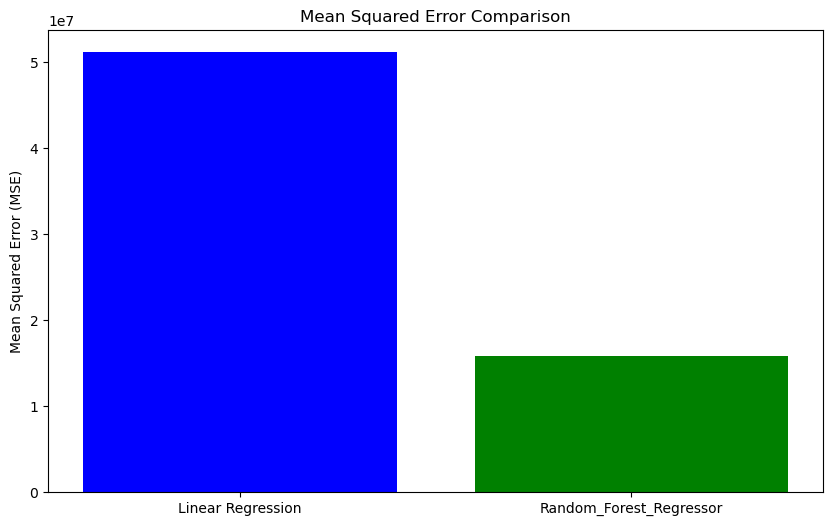

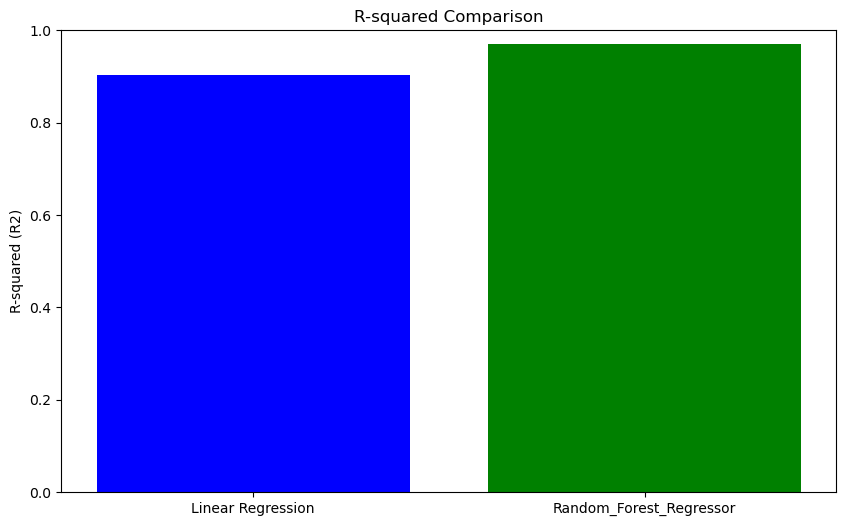

In [42]:
# Bar chart for MSE
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_scores, color=['blue', 'green'])
plt.title('Mean Squared Error Comparison')
plt.ylabel('Mean Squared Error (MSE)')
plt.show()
# Bar chart for R2
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_scores, color=['blue', 'green'])
plt.title('R-squared Comparison')
plt.ylabel('R-squared (R2)')
plt.ylim(0, 1) # R2 score is between 0 and 1
plt.show()

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
# Perform feature scaling (Standardization) if needed
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# user input
duration = float(input("Enter the duration (in hours): "))
days_left = int(input("Enter the number of days left for the flight: "))
departure_time_encoded=int(input("Enter the departure time for the flight:Afternoon: 0 ,Early_Morning: 1 ,Evening: 2 ,Late_Night: 3 ,Morning: 4 ,Night: 5"))
class_type_encoded = int(input("Enter the Class type for the flight: 1 for Economy and 0 for buisness class"))
arrival_time_encoded=int(input("Enter the arrival time for the flight: Afternoon: 0 ,Early_Morning: 1 ,Evening: 2 ,Late_Night: 3 ,Morning: 4 ,Night: 5"))
destination_city_encoded=int(input("Enter the Destination city for the flight: Bangalore: 0 ,Chennai: 1 ,Delhi: 2 , Hyderabad: 3 , Kolkata: 4 , Mumbai: 5"))
source_city_encoded=int(input("Enter the SOURCE city for the flight: Bangalore: 0 ,Chennai: 1 ,Delhi: 2 , Hyderabad: 3 , Kolkata: 4 , Mumbai: 5"))
airline_encoded=int(input("Enter the AIRLINE NAME for the flight: AirAsia: 0 , Air_India: 1 , GO_FIRST: 2 ,Indigo: 3 , SpiceJet: 4  ,Vistara: 5"))
flight_encoded= int(input("Enter the name OF THE FLIGHT (THE FLIGHT NAME ARE IN BETWEEN 1 to 1087"))
stops_encoded = int(input("Enter the Class type for the flight: choose 0:for 1 , choos 1 : for two or more , choose 2: for 1"))
# Create a user input dictionary with the values provided by the user
user_input = {
 'duration': duration,
 'days_left': days_left,
 'departure_time_encoded': departure_time_encoded,
 'class_type_encoded': class_type_encoded,
 'arrival_time_encoded': arrival_time_encoded,
 'destination_city_encoded': destination_city_encoded,
 'source_city_encoded': source_city_encoded,
 'airline_encoded': airline_encoded,
 'flight_encoded': flight_encoded,
 'stops_encoded': stops_encoded
}
# Create a DataFrame from the user input
user_df = pd.DataFrame(user_input, index=[0])
# Make sure the column order is the same as during training
user_df = user_df[['duration', 'days_left', 'departure_time_encoded', 'class_type_encoded','arrival_time_encoded','destination_city_encoded','source_city_encoded','airline_encoded','flight_encoded','stops_encoded']]
# Perform feature scaling on the user input data using the same scaler used for traini
user_df_scaled = scaler.transform(user_df)
# Make price predictions using the RandomForestRegressor model
predicted_prices_rf = model_rf.predict(user_df_scaled)
print(f"Predicted Price using RandomForestRegressor: {predicted_prices_rf[0]}")

Predicted Price using RandomForestRegressor: 11561.4


c:\Users\pradh\anaconda3\Lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder

# Assuming 'sampled_df' is your DataFrame

# Convert the 'price' column into categorical labels (you can customize this based on your specific needs)
price_labels = ['low', 'medium', 'high']
sampled_df['price_category'] = pd.cut(sampled_df['price'], bins=[-float('inf'), 10000, 30000, float('inf')], labels=price_labels)

# Features and target variable for classification
X_classification = sampled_df[['duration', 'days_left', 'departure_time_encoded', 'class_type_encoded', 'arrival_time_encoded',
                                'destination_city_encoded', 'source_city_encoded', 'airline_encoded',
                                'flight_encoded', 'stops_encoded']]
y_classification = sampled_df['price_category']

# Encode categorical labels to numerical values
le = LabelEncoder()
y_classification_encoded = le.fit_transform(y_classification)

# Split the data into a training set and a testing set for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification_encoded, test_size=0.2, random_state=42
)

# Create a K-Nearest Neighbors (KNN) model
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training data
knn_classifier.fit(X_train_classification, y_train_classification)

# Make predictions on the testing data
y_pred_classification = knn_classifier.predict(X_test_classification)

# Calculate and print evaluation metrics
accuracy_k = accuracy_score(y_test_classification, y_pred_classification)
precision_k = precision_score(y_test_classification, y_pred_classification, average='weighted')
f1_k = f1_score(y_test_classification, y_pred_classification, average='weighted')
recall_k = recall_score(y_test_classification, y_pred_classification, average='weighted')

print(f'Accuracy: {accuracy_k}')
print(f'Precision: {precision_k}')
print(f'F1 Score: {f1_k}')
print(f'Recall: {recall_k}')


Accuracy: 0.6525
Precision: 0.6475534831768316
F1 Score: 0.645246726227443
Recall: 0.6525


In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'sampled_df' is your DataFrame

# Convert the 'price' column into categorical labels (you can customize this based on your specific needs)
price_labels = ['low', 'medium', 'high']
sampled_df['price_category'] = pd.cut(sampled_df['price'], bins=[-float('inf'), 10000, 30000, float('inf')], labels=price_labels)

# Features and target variable for classification
X_classification = sampled_df[['duration', 'days_left', 'departure_time_encoded', 'class_type_encoded', 'arrival_time_encoded',
                                'destination_city_encoded', 'source_city_encoded', 'airline_encoded',
                                'flight_encoded', 'stops_encoded']]
y_classification = sampled_df['price_category']

# Encode categorical labels to numerical values
le = LabelEncoder()
y_classification_encoded = le.fit_transform(y_classification)

# Split the data into a training set and a testing set for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification_encoded, test_size=0.2, random_state=42
)

# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(X_train_classification, y_train_classification)
y_pred_decision_tree = decision_tree_classifier.predict(X_test_classification)

# Evaluate Decision Tree Classifier
accuracy_decision_tree = accuracy_score(y_test_classification, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test_classification, y_pred_decision_tree, average='weighted')
f1_decision_tree = f1_score(y_test_classification, y_pred_decision_tree, average='weighted')
recall_decision_tree = recall_score(y_test_classification, y_pred_decision_tree, average='weighted')

print("Decision Tree Classifier:")
print(f'Accuracy: {accuracy_decision_tree}')
print(f'Precision: {precision_decision_tree}')
print(f'F1 Score: {f1_decision_tree}')
print(f'Recall: {recall_decision_tree}')


Decision Tree Classifier:
Accuracy: 0.931
Precision: 0.9304476654770234
F1 Score: 0.9307127877860938
Recall: 0.931


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Assuming 'sampled_df' is your DataFrame

# Convert the 'price' column into categorical labels (you can customize this based on your specific needs)
price_labels = ['low', 'medium', 'high']
sampled_df['price_category'] = pd.cut(sampled_df['price'], bins=[-float('inf'), 10000, 30000, float('inf')], labels=price_labels)

# Features and target variable for classification
X_classification = sampled_df[['duration', 'days_left', 'departure_time_encoded', 'class_type_encoded', 'arrival_time_encoded',
                                'destination_city_encoded', 'source_city_encoded', 'airline_encoded',
                                'flight_encoded', 'stops_encoded']]
y_classification = sampled_df['price_category']

# Encode categorical labels to numerical values
le = LabelEncoder()
y_classification_encoded = le.fit_transform(y_classification)

# Split the data into a training set and a testing set for classification
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X_classification, y_classification_encoded, test_size=0.2, random_state=42
)

# Random Forest Classifier
random_forest_classifier = RandomForestClassifier(random_state=42)
random_forest_classifier.fit(X_train_classification, y_train_classification)
y_pred_random_forest = random_forest_classifier.predict(X_test_classification)

# Evaluate Random Forest Classifier
accuracy_random_forest = accuracy_score(y_test_classification, y_pred_random_forest)
precision_random_forest = precision_score(y_test_classification, y_pred_random_forest, average='weighted')
f1_random_forest = f1_score(y_test_classification, y_pred_random_forest, average='weighted')
recall_random_forest = recall_score(y_test_classification, y_pred_random_forest, average='weighted')

print("\nRandom Forest Classifier:")
print(f'Accuracy: {accuracy_random_forest}')
print(f'Precision: {precision_random_forest}')
print(f'F1 Score: {f1_random_forest}')
print(f'Recall: {recall_random_forest}')



Random Forest Classifier:
Accuracy: 0.955
Precision: 0.9537555577119785
F1 Score: 0.9541281485750698
Recall: 0.955


In [51]:
models = [ 'KNN', 'Decision Tree', 'Random Forest']
acc_scores = [accuracy_k, accuracy_decision_tree, accuracy_random_forest ]
prec_scores = [precision_k, precision_decision_tree,precision_random_forest ]
f1_scores = [f1_k,f1_decision_tree, f1_random_forest]
recall_scores = [recall_k, recall_decision_tree, recall_random_forest]
best_model = acc_scores.index(max(acc_scores))
print(f'Best model based on accuracy: {models[best_model]}')
best_model = prec_scores.index(max(prec_scores))
print(f'Best model based on precision: {models[best_model]}')
best_model = f1_scores.index(max(f1_scores))
print(f'Best model based on f1 score: {models[best_model]}')
best_model = recall_scores.index(max(recall_scores))
print(f'Best model based on recall: {models[best_model]}')

Best model based on accuracy: Random Forest
Best model based on precision: Random Forest
Best model based on f1 score: Random Forest
Best model based on recall: Random Forest


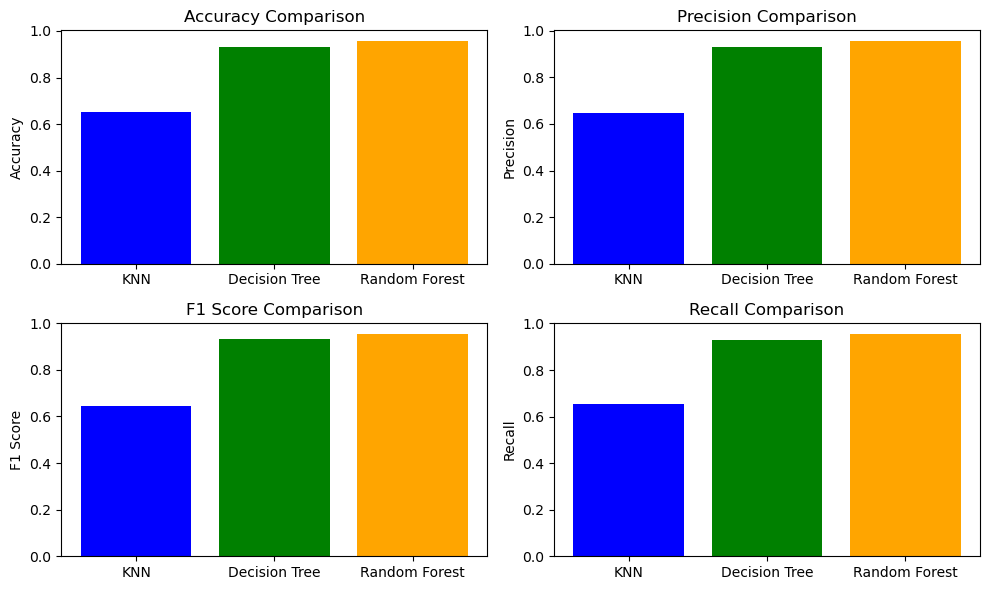

Best model based on accuracy: Random Forest
Best model based on precision: Random Forest
Best model based on F1 score: Random Forest
Best model based on recall: Random Forest


In [52]:
import matplotlib.pyplot as plt
# Assuming 'models', 'acc_scores', 'prec_scores', 'f1_scores', 'recall
# Find the best model based on accuracy
best_model_accuracy = models[acc_scores.index(max(acc_scores) ) ]
# Find the best model based on precision
best_model_precision = models[prec_scores.index(max(prec_scores))]
# Find the best model based on F1 score
best_model_f1 = models[f1_scores. index(max(f1_scores) ) ]
# Find the best model based on recall
best_model_recall = models[recall_scores. index(max(recall_scores))]
# Plot the results
plt.figure(figsize=(10, 6))
# Bar plot for accuracy
plt.subplot(2, 2, 1)
plt.bar(models, acc_scores, color=['blue', 'green', 'orange'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
# Bar plot for precision
plt.subplot(2, 2, 2)
plt.bar(models, prec_scores, color=['blue', 'green', 'orange'])
plt.title('Precision Comparison')
plt.ylabel('Precision')
# Bar plot for F1 score
plt.subplot(2, 2, 3)
plt.bar(models, f1_scores, color=['blue', 'green', 'orange'])
plt.title('F1 Score Comparison')
plt.ylabel('F1 Score')
# Bar plot for recall
plt.subplot(2, 2, 4)
plt.bar(models, recall_scores, color=['blue', 'green', 'orange'])
plt.title('Recall Comparison')
plt.ylabel('Recall')
plt.tight_layout()
plt.show()
# Print the best models based on different metrics
print(f'Best model based on accuracy: {best_model_accuracy}')
print(f'Best model based on precision: {best_model_precision}')
print(f'Best model based on F1 score: {best_model_f1}')
print(f'Best model based on recall: {best_model_recall}')